In [1]:
#!pip install freetype-py svgpathtools shapely matplotlib

In [2]:
FONT_NAME = "Arial"
FONT_SIZE = 20            # mm
SCALE = 1.0               # additional scaling

SAFE_Z = 5.0
CUT_Z = -0.5
FEED_RATE = 800           # mm/min


C:\Windows\Fonts\arial.ttf


In [4]:
from 

calc = PathCalculator(FONT_NAME, FONT_SIZE)

In [54]:
text = "Hello quick brown fox"# that jumps"

# print(len(generate_paths("quick ")))
# print(len(generate_paths("brown")))

all_paths = calc.generate_paths(text)
print(f'Generated {len(all_paths)} paths')

Generated 25 paths


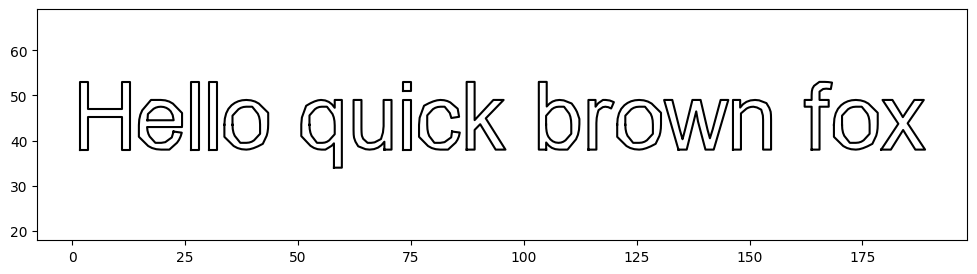

Plotted 510 contours


In [55]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 3))

contours_count = 0

for contour in all_paths:
    plt.plot(contour[:, 0], contour[:, 1], 'k-')
    contours_count += len(contour)

plt.axis('equal')
#plt.gca().invert_yaxis()
plt.show()

print(f'Plotted {contours_count} contours')


In [97]:
#all_paths

In [ ]:
def contours_to_gcode(contours):
    gcode = []
    gcode.append("G21  ; mm mode")
    gcode.append("G90  ; absolute positioning")

    for contour in contours:
        x0, y0 = contour[0]
        gcode.append(f"G0 Z{SAFE_Z}")
        gcode.append(f"G0 X{x0:.3f} Y{y0:.3f}")
        gcode.append(f"G1 Z{CUT_Z} F{FEED_RATE}")

        for x, y in contour[1:]:
            gcode.append(f"G1 X{x:.3f} Y{y:.3f}")

        gcode.append(f"G0 Z{SAFE_Z}")

    return gcode


In [ ]:
gcode = contours_to_gcode(all_paths)

print("\n".join(gcode[:20]))


In [ ]:
with open("text.nc", "w") as f:
    f.write("\n".join(gcode))


In [14]:
import freetype

face = freetype.Face(FONT_PATH)
face.set_pixel_sizes(0, 40)

for ch in "ABC":
    face.load_char(ch)
    print(ch, face.glyph.advance.x / 64)


A 27.0
B 27.0
C 29.0
